<a href="https://colab.research.google.com/github/zardemostoles/zardemostoles-uoc.edu/blob/master/TFG_Despliegue_Modelo_AWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Se actualiza SageMaker
!pip install -q --upgrade "sagemaker>=2"

In [ ]:
# Módulos necesarios
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import boto3
import json

from sagemaker.tensorflow import TensorFlowModel
from sagemaker.serverless import ServerlessInferenceConfig
from sagemaker import get_execution_role
from sagemaker import Session

In [ ]:
# Se obtienen el rol  y la sesión
role = get_execution_role()
sess = Session()
bucket = sess.default_bucket()

In [ ]:
# Se crea un módelo a partir del tarball
model = TensorFlowModel(model_data='s3://uoc-tfg/TFG_mejor_modelo.tar.gz', 
                        source_dir="source",
                        entry_point="inference.py",
                        name='TFG-modelo',
                        framework_version='2.10',
                        role=role)

In [ ]:
# Se configura un serverless endpoint
serverless_config = ServerlessInferenceConfig(
        memory_size_in_mb=4096, 
        max_concurrency=10,
)

In [ ]:
# Se despliega el endpoing con el modelo
predictor = model.deploy(initial_instance_count=1, 
                         endpoint_name="TFG-endpoint",
                         serverless_inference_config=serverless_config)

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


---------!

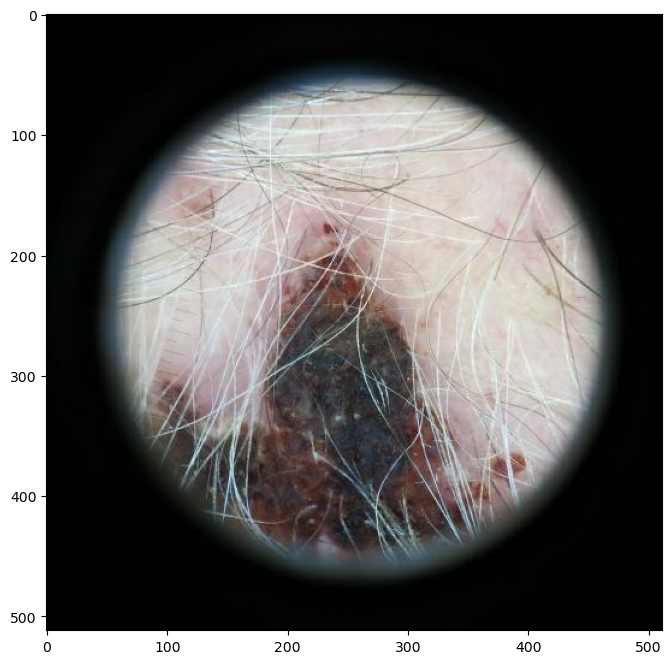

In [ ]:
# Se visualiza una imagen
image_file = "ISIC_0053555.jpg"
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
image = PIL.Image.open(image_file)
plt.imshow(image)
plt.show()


In [ ]:
endpoint = 'TFG-endpoint'
runtime = boto3.Session().client('sagemaker-runtime')

In [ ]:
with open(image_file, "rb") as f:
    payload = f.read()
    payload = bytearray(payload)
    
response = runtime.invoke_endpoint(EndpointName=endpoint, ContentType="image/png", Body=payload)
result = json.loads(response['Body'].read().decode())
res = result['predictions']
res

[[0.978774607]]

In [ ]:
# Si se desea eliminar el endpoint
predictor.delete_endpoint()